## 非正規分布に基づく異常検知

### 1. k近傍法
- 内容：あるデータを中心とした一定の距離範囲以内にデータ点k個が入ることを基準
- 課題：データの密度により本質的なクラスター作成ができなくなる
    - 局所外れ値因子法で解決

### 2. 局所外れ値因子法（LOF）
- 局所異常度：データ点pのk個の近傍点の距離の平均 / 近傍点を中心としたk個の近傍点との距離の平均
- データに局所的なばらつきがある場合：局所異常度が1から外れる

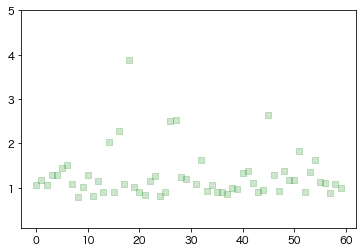

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
from numpy import linalg as la

### データ読み込み ###
davis = pd.read_csv('./../data/Davis_1_2.csv').values
threshold= 0.0018

index_list  =   [ ]
p_list    =   [ ]
alpha_list   =   [ ]

d = 0
p  = 0
x = davis[1:60 ,2] # 59人分のデータ
y = davis[1:60 ,3]
dx = x - x.mean(axis = 0)
dy = y - y.mean(axis = 0)
data = dx.shape[0]


##### データ点pのk個の近傍点の距離の平均(d)を算出 #####

# 任意の点を定義（全点数分行うためloop)
for s in range(data):
    distance = []

    # 任意の点(s)とその他の点の距離を算出し、distanceに格納
    for i in range(data):
        dxl = dx[i] - dx[s]
        dyl = dy[i] - dy[s]
        d2 = (dxl** 2 + dyl** 2)**0.5
        distance.append(d2)
    
    # distanceの配列化
    distance_array = np.array(distance)
    
    # sort処理
    index_list = sorted(range(len(distance_array)), key=lambda j: distance_array[j]) # distanceの大小でsortし、そのindexを取得
    distance_array = np.sort(distance_array)
    
    # 近傍点を定義
    k=20
    
    # 任意点とk個の近傍点との距離の平均値を算出
    for n in range(k):
        d = d + distance_array[n]
    d = d/k # 平均値
    
##### 近傍点を中心としたk個の近傍点との距離の平均 #####

    # 任意の近傍点をmとして定義
    for k_i in index_list[1:k+1]:
        
        # 各近傍点とデータの差分(p_list)を総和
        p_list=[ ]
        
        # 各データと任意の近傍点との距離を算出
        for i in range(data):
            xl = dx[i] - dx[k_i]
            yl = dy[i] - dy[k_i]
            l2 = (xl**2 + yl**2)**0.5
            p_list.append(l2)
        
        p_list = np.array(p_list)
        p_list_sorted = np.sort(p_list)
        
        for n in range(k) :
            p = p + p_list_sorted[n]
    p = (p/k) / k # 各近傍点での距離の平均を算出し、総和したのでさらにその平均を取る
    
    # 局所異常度を算出
    alpha = d/p
    alpha_list.append(alpha)
    
abnormals = np.array(alpha_list)

dx = np.linspace(0, 59, 59)
plt.scatter(np.round(dx),abnormals, marker =  ",",   c="green", alpha=0.2)
plt.ylim(0.1,5)
plt.show()